In [3]:
import os
import shutil
import numpy as np
import pandas  as pd
import matplotlib
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.layers import BatchNormalization




In [4]:
#EDA

In [5]:
#LOADING DATASETS TO THE NOTEBOOK
#Loading A-Z CAPS HANDWRITING DATASET 
letter_full_data = pd.read_csv('./letters_handwritten_data.csv').astype('uint8')
letter_full_data.rename(columns={'0':'label'}, inplace=True)
letter_full_data.shape



(372450, 785)

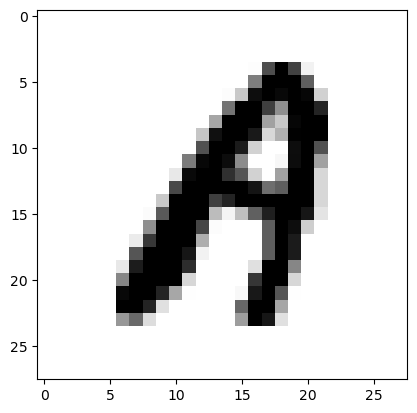

In [6]:
values_az = letter_full_data.drop('label', axis=1).to_numpy()
labels_az = letter_full_data['label'].to_numpy()

sample_data = values_az[0]
sample_image = sample_data.reshape(28,28) #Because de dimension of the dataset is 785, 28x28=785 pixels
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [7]:
letter_full_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Data columns (total 785 columns):
 #    Column  Dtype
---   ------  -----
 0    label   uint8
 1    0.1     uint8
 2    0.2     uint8
 3    0.3     uint8
 4    0.4     uint8
 5    0.5     uint8
 6    0.6     uint8
 7    0.7     uint8
 8    0.8     uint8
 9    0.9     uint8
 10   0.10    uint8
 11   0.11    uint8
 12   0.12    uint8
 13   0.13    uint8
 14   0.14    uint8
 15   0.15    uint8
 16   0.16    uint8
 17   0.17    uint8
 18   0.18    uint8
 19   0.19    uint8
 20   0.20    uint8
 21   0.21    uint8
 22   0.22    uint8
 23   0.23    uint8
 24   0.24    uint8
 25   0.25    uint8
 26   0.26    uint8
 27   0.27    uint8
 28   0.28    uint8
 29   0.29    uint8
 30   0.30    uint8
 31   0.31    uint8
 32   0.32    uint8
 33   0.33    uint8
 34   0.34    uint8
 35   0.35    uint8
 36   0.36    uint8
 37   0.37    uint8
 38   0.38    uint8
 39   0.39    uint8
 40   0.40    uint8
 41   0.41    uint8
 42   0.

In [8]:
letter_full_data.isnull().sum()

label    0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [9]:
#Checking unique values of each columns and what this values are in order to confirm
#dataset original description

for col in letter_full_data.columns:
    print(col)
    print(letter_full_data[col].unique()[:5])
    print(letter_full_data[col].nunique())
    print()

label
[0 1 2 3 4]
26

0.1
[0]
1

0.2
[0]
1

0.3
[0]
1

0.4
[0]
1

0.5
[0]
1

0.6
[0]
1

0.7
[0]
1

0.8
[0]
1

0.9
[0]
1

0.10
[0]
1

0.11
[0]
1

0.12
[0]
1

0.13
[0]
1

0.14
[0]
1

0.15
[0]
1

0.16
[0]
1

0.17
[0]
1

0.18
[0]
1

0.19
[0]
1

0.20
[0]
1

0.21
[0 1]
2

0.22
[0 1]
2

0.23
[0 1]
2

0.24
[0]
1

0.25
[0]
1

0.26
[0]
1

0.27
[0]
1

0.28
[0]
1

0.29
[0]
1

0.30
[0]
1

0.31
[0]
1

0.32
[0 5]
2

0.33
[ 0 40]
2

0.34
[ 0 17]
2

0.35
[0 2]
2

0.36
[ 0 20]
2

0.37
[ 0 26]
2

0.38
[0 3]
2

0.39
[0]
1

0.40
[0]
1

0.41
[0]
1

0.42
[0]
1

0.43
[0 5 4]
3

0.44
[ 0 43 29]
3

0.45
[ 0 35 11]
3

0.46
[0 4 1]
3

0.47
[0]
1

0.48
[0 1]
2

0.49
[ 0 10  4]
3

0.50
[ 0 36 35]
3

0.51
[ 0 36 71]
3

0.52
[ 0 10  9]
3

0.53
[0 1]
2

0.54
[0]
1

0.55
[0]
1

0.56
[0]
1

0.57
[0]
1

0.58
[0]
1

0.59
[0 1 6]
3

0.60
[ 0 18 45 42]
4

0.61
[  0  63 150   8   7]
7

0.62
[  0   2   9 103  61]
7

0.63
[ 0 14 17 20  7]
6

0.64
[ 0  2  1 95  5]
5

0.65
[  0   1 144]
3

0.66
[ 0  3 12  5 45]
5

0.67
[ 0 24 26

In [10]:
#Loading mnist dataset
#According to the tensorflow documentation the codeline used here return the tuple numpy arrays as written here

(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = keras.datasets.mnist.load_data(path="mnist.npz")

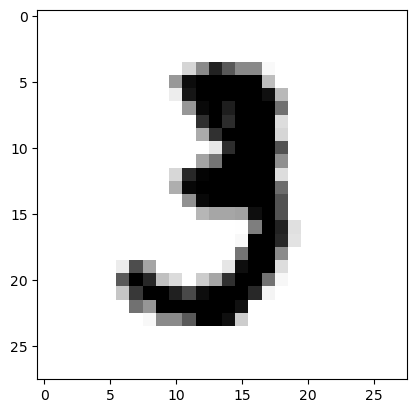

In [11]:
sample_data = X_mnist_train[10]
sample_image = sample_data.reshape(28,28)  #Because de dimension of the dataset is 785, 28x28=785 pixels
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [12]:
#Joining the A-Z and number data sets in a single one

### in the A-Z dataset the labels are 0-26 wich overlap with the labels of the number dataset 0-9

letter_dict = {
    0: 10, 1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19, 10: 20,
    11: 21, 12: 22, 13: 23, 14: 24, 15: 25, 16: 26, 17: 27, 18: 28, 19: 29, 20: 30,
    21: 31, 22: 32, 23: 33, 24: 34, 25: 35
}

letter_full_data['label']= letter_full_data['label'].map(letter_dict)

x_letter = letter_full_data.drop('label', axis = 1)
x_letter = np.reshape(x_letter.values, (x_letter.shape[0], 28, 28)) #Because de dimension of the dataset is 785, 28x28=785 pixels
y_letter = letter_full_data['label']

#From the keras dataset documentation we can confirm that the mnist number dataset loaded in the following way returns a tupple
(trainX, trainY), (testX, testY) = mnist.load_data()

print(x_letter.shape)
print(y_letter.shape)
print(trainX.shape)
print(trainY.shape)

(372450, 28, 28)
(372450,)
(60000, 28, 28)
(60000,)


In [13]:
#Joining the number dataset in a single one for later join it with the A-Z dataset
x_number = np.vstack([trainX, testX])
y_number = np.hstack([trainY, testY])

#Joining the number and letter dataset
x_data = np.vstack([x_letter, x_number])
y_data = np.hstack([y_letter, y_number])

#splitting the complete dataset for creating our train and test dataset

(trainX, testX, trainY, testY) = train_test_split(x_data,
y_data, test_size=0.20, stratify=y_data, random_state=42)

# according to documentation, the dataset is in grey scale
# reshape dataset to have a single channe (this means grey scale)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values, and make it a classification problem
trainY = to_categorical(trainY, num_classes = 36, dtype = 'int')
testY = to_categorical(testY, num_classes = 36, dtype = 'int')

In [14]:
#Normalizing de train and test datasets, the maximum pixel value can have is 255
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0


In [16]:
# define cnn model
#a function is created to test different optimizer and then do hyperparameter tunning



def define_model(optimizer):
	model = Sequential()
	model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization()) #Used to avoid 'gradient explosion' as seen in previous experiments with this dataset
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2)) #Used to avoid 'gradient explosion' as seen in previous experiments with this dataset
	model.add(Flatten())
	model.add(Dense(36, activation='softmax')) #36 is the number of total labels in the dataset
	opt = optimizer
	model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [36]:
optimizer_first = SGD(learning_rate=0.1, momentum=0.3, nesterov=False, global_clipnorm=0.5)#0.002, global_clipnorm is used to avoid gradient explosion
optimizer_second = 'adam'
optimizer_list = [optimizer_first, optimizer_second]

In [37]:
for optimizer in optimizer_list:
   # define model
   model = define_model(optimizer)
   # fit model
   model.fit(trainX, trainY, epochs=3, batch_size=32, validation_data = (testX, testY))

   # evaluate model on test dataset
   _, acc = model.evaluate(testX, testY, verbose=0)
   print(f'Model with optimizer{optimizer} the accuracy is:')
   print('> %.3f' % (acc * 100.0))


Epoch 1/3
11062/11062 [==============================] - 82s 7ms/step - loss: 0.2419 - accuracy: 0.9332 - val_loss: 0.1247 - val_accuracy: 0.9676
Epoch 2/3
11062/11062 [==============================] - 81s 7ms/step - loss: 0.1138 - accuracy: 0.9701 - val_loss: 0.1021 - val_accuracy: 0.9735
Epoch 3/3
11062/11062 [==============================] - 81s 7ms/step - loss: 0.0903 - accuracy: 0.9770 - val_loss: 0.0819 - val_accuracy: 0.9795
Model with optimizer<keras.src.optimizers.sgd.SGD object at 0x7f135811bb10> the accuracy is:
> 97.948
Epoch 1/3
11062/11062 [==============================] - 80s 7ms/step - loss: 0.1804 - accuracy: 0.9490 - val_loss: 0.0999 - val_accuracy: 0.9721
Epoch 2/3
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0876 - accuracy: 0.9741 - val_loss: 0.0773 - val_accuracy: 0.9788
Epoch 3/3
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0645 - val_accuracy: 0.9815
Model with optimizerad

In [21]:
learning_rates = [0.001, 0.01, 0.1]
best_accuracy = 0.0
best_params = {}

for lr in learning_rates:
    optimizer = Adam(learning_rate=lr)
    # define model
    model = define_model(optimizer)
    # fit model
    model.fit(trainX, trainY, epochs=6, batch_size=32, validation_data = (testX, testY))

    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print(f'Model with learning rate: {lr} the accuracy is:')
    print('> %.3f' % (acc * 100.0))
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {'optimizer': optimizer, 'learning_rate': lr}
        model.save('initial_model.h5')

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")




Epoch 1/6
11062/11062 [==============================] - 80s 7ms/step - loss: 0.1788 - accuracy: 0.9492 - val_loss: 0.1045 - val_accuracy: 0.9713
Epoch 2/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0878 - accuracy: 0.9744 - val_loss: 0.0815 - val_accuracy: 0.9770
Epoch 3/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.0728 - val_accuracy: 0.9793
Epoch 4/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 5/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0590 - val_accuracy: 0.9839
Epoch 6/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0630 - val_accuracy: 0.9857
Model with learning rate: 0.001 the accuracy is:
> 98.570


/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
11062/11062 [==============================] - 80s 7ms/step - loss: 0.3485 - accuracy: 0.9071 - val_loss: 0.2138 - val_accuracy: 0.9407
Epoch 2/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.2663 - accuracy: 0.9281 - val_loss: 0.2371 - val_accuracy: 0.9351
Epoch 3/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.2597 - accuracy: 0.9308 - val_loss: 0.2219 - val_accuracy: 0.9448
Epoch 4/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.2685 - accuracy: 0.9302 - val_loss: 0.3014 - val_accuracy: 0.9223
Epoch 5/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.2583 - accuracy: 0.9325 - val_loss: 0.2052 - val_accuracy: 0.9434
Epoch 6/6
11062/11062 [==============================] - 79s 7ms/step - loss: 0.2650 - accuracy: 0.9319 - val_loss: 0.1726 - val_accuracy: 0.9554
Model with learning rate: 0.01 the accuracy is:
> 95.544
Epoch 1/6
11062/11062 [==============================] - 80s 7ms/st

In [36]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


letter_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K',
    11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U',
    21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

#load the image
img= load_image('RB.png')
# load model
model = load_model('initial_model.h5')
# predict the class
predict_value = model.predict(img)
digit = argmax(predict_value)-10
print(letter_dict[digit])


1/1 [==============================] - 0s 55ms/step
R


In [17]:
#We did the following hyperparameter tunning:
# 1) tried different values for the learning rate in the optimizied Adam [0.001, 0.01, 0.1], where the best performance is 0.001
# 2) Increased the number of epochs from 3 to 6.
# throughout our experiments we had four different models with accuracy of %98.153, %98.570, %95.544, %13.09

In [24]:
# creating requirement text file
%pip freeze

absl-py @ file:///home/conda/feedstock_root/build_artifacts/absl-py_1695154477682/work
aiobotocore @ file:///home/conda/feedstock_root/build_artifacts/aiobotocore_1698794841925/work
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1701099470639/work
aioitertools @ file:///home/conda/feedstock_root/build_artifacts/aioitertools_1663521246073/work
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1667935791922/work
aiosqlite @ file:///home/conda/feedstock_root/build_artifacts/aiosqlite_1682491975081/work
alembic @ file:///home/conda/feedstock_root/build_artifacts/alembic_1698347477885/work
annotated-types @ file:///home/conda/feedstock_root/build_artifacts/annotated-types_1696634205638/work
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1688651106312/work/dist
apprise @ file:///home/conda/feedstock_root/build_artifacts/apprise_1697471134729/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_16928183187

In [14]:
!python --version

Python 3.11.6
